In [1]:
from maf import * 
import pandas as pd
import matplotlib.pyplot as plt

#### GCN EDL model without NF

In [2]:
train = []
with open("train.txt", "r") as file:
    temp = file.read()
    for i in temp.strip().split('\n'):
        train.append(i)

val = []
with open("validate.txt", "r") as file:
    temp = file.read()
    for i in temp.strip().split('\n'):
        val.append(i)

In [3]:
df = pd.DataFrame(columns=["Epoch", "TrainLoss", "TrainScore"])
val_df = pd.DataFrame(columns=["Epoch", "ValLoss", "ValScore"])

In [4]:
for i in range(len(train)):
    epoch = int(train[i].strip('][').split(', ')[0])
    loss = float(train[i].strip('][').split(', ')[1].split('(')[1])
    score = float(train[i].strip('][').split(', ')[-1])

    appendlist = [epoch, loss, score]
    
    df.loc[len(df)] = appendlist
    
for i in range(len(val)):

    epoch = int(val[i].strip('][').split(', ')[0])
    loss = float(val[i].strip('][').split(', ')[1])
    score = float(val[i].strip('][').split(', ')[-1])

    appendlist = [epoch, loss, score]
    
    val_df.loc[len(val_df)] = appendlist

In [5]:
Score = pd.concat([df, val_df], axis=1)


In [6]:
Score


,Epoch,TrainLoss,TrainScore,Epoch,ValLoss,ValScore
0,1.0,1.5612,0.327964,1.0,NaN,0.304623
1,2.0,1.6330,0.315690,2.0,1.096600,0.303882
2,3.0,1.5597,0.325710,3.0,NaN,0.333728
3,4.0,1.5181,0.311136,4.0,NaN,0.375549
4,5.0,1.5081,0.327016,5.0,NaN,0.351191
5,6.0,1.5448,0.338544,6.0,1.196501,0.350024
6,7.0,1.5045,0.334920,7.0,1.283984,0.348705
7,8.0,1.5078,0.325637,8.0,NaN,0.345738
8,9.0,1.4352,0.325347,9.0,NaN,0.345924
9,10.0,1.4300,0.324594,10.0,NaN,0.341064


In [7]:
meanloss = [Score.TrainLoss.mean() for i in range(len(Score.Epoch))]
meanscore = [Score.TrainScore.mean() for i in range(len(Score.Epoch))]

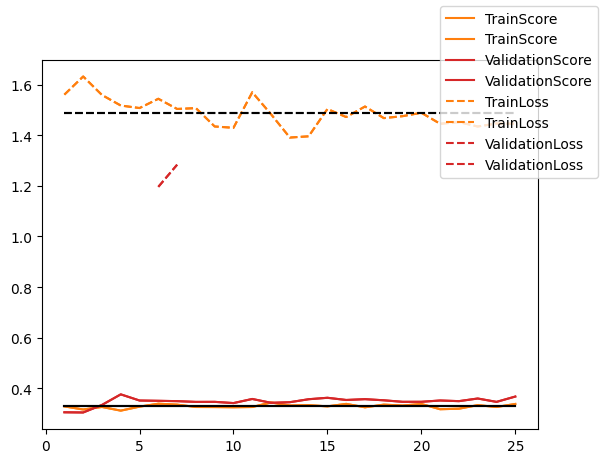

In [8]:
import matplotlib.pyplot as plt

x = Score.Epoch
fig, ax = plt.subplots()
line1 = ax.plot(x, Score.TrainScore, label = "TrainScore", color='C1')
line2 = ax.plot(x, Score.ValScore, label = "ValidationScore", color='C3')
line3 = ax.plot(x, Score.TrainLoss, label = "TrainLoss", linestyle='dashed', color='C1')
line4 = ax.plot(x, Score.ValLoss, label = "ValidationLoss", linestyle='dashed', color='C3')
mean = ax.plot(x, meanscore, color="black")
sco = ax.plot(x, meanloss, linestyle="dashed", color="black")

fig.legend()

plt.show()

### Training with NF


In [9]:
train = []
with open("train_final2.txt", "r") as file:
    temp = file.read()
    for i in temp.strip().split('\n'):
        train.append(i)

val = []
with open("val_final2.txt", "r") as file:
    temp = file.read()
    for i in temp.strip().split('\n'):
        val.append(i)

In [10]:
df = pd.DataFrame(columns=["Epoch", "TrainLoss", "TrainScore"])
val_df = pd.DataFrame(columns=["Epoch", "ValLoss", "ValScore"])

In [11]:
for i in range(len(train)):
    epoch = int(train[i].strip('][').split(', ')[0])
    loss = float(train[i].strip('][').split(', ')[1].split('(')[1])
    score = float(train[i].strip('][').split(', ')[-1])

    appendlist = [epoch, loss, score]
    
    df.loc[len(df)] = appendlist
    
for i in range(len(val)):
    epoch = int(val[i].strip('][').split(', ')[0])
    loss = float(val[i].strip('][').split(', ')[1].split('(')[1])
    score = float(val[i].strip('][').split(', ')[-1])

    appendlist = [epoch, loss, score]
    
    val_df.loc[len(val_df)] = appendlist

In [12]:
Score = pd.concat([df, val_df], axis=1)


In [13]:
Score


,Epoch,TrainLoss,TrainScore,Epoch,ValLoss,ValScore
0,1.0,0.6737,0.790249,1.0,0.6730,0.917391
1,2.0,0.6713,0.893731,2.0,0.6707,0.916416
2,3.0,0.6688,0.919338,3.0,0.6682,0.918302
3,4.0,0.6665,0.918225,4.0,0.6659,0.918653
4,5.0,0.6640,0.920886,5.0,0.6639,0.917318
5,6.0,0.6613,0.919737,6.0,0.6614,0.919734
6,7.0,0.6598,0.920200,7.0,0.6594,0.918485
7,8.0,0.6576,0.919449,8.0,0.6572,0.918769
8,9.0,0.6556,0.918443,9.0,0.6553,0.917851
9,10.0,0.6535,0.917579,10.0,0.6529,0.919482


In [14]:
meanloss = [Score.TrainLoss.mean() for i in range(len(Score.Epoch))]
meanscore = [Score.TrainScore.mean() for i in range(len(Score.Epoch))]

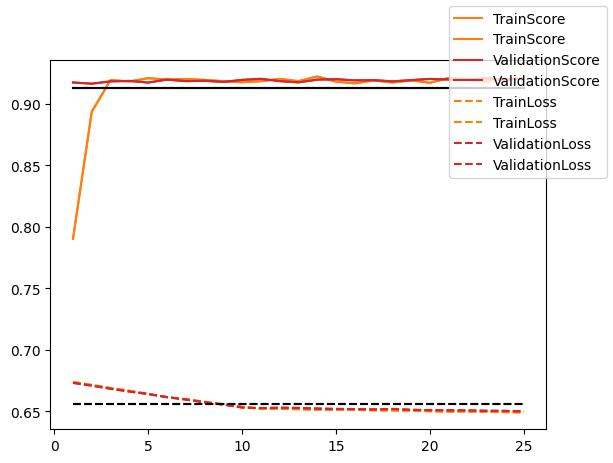

In [15]:
import matplotlib.pyplot as plt

x = Score.Epoch
fig, ax = plt.subplots()
line1 = ax.plot(x, Score.TrainScore, label = "TrainScore", color='C1')
line2 = ax.plot(x, Score.ValScore, label = "ValidationScore", color='C3')
line3 = ax.plot(x, Score.TrainLoss, label = "TrainLoss", linestyle='dashed', color='C1')
line4 = ax.plot(x, Score.ValLoss, label = "ValidationLoss", linestyle='dashed', color='C3')
mean = ax.plot(x, meanscore, color="black")
sco = ax.plot(x, meanloss, linestyle="dashed", color="black")

fig.legend()

plt.show()